In [68]:
import pandas as pd
from fbprophet import Prophet 
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


# PRACTICING WITH PEYTON

In [69]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [70]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [71]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3265,2017-01-15,7.180847,7.484119,8.912103,6.837290,7.526652,1.018428,1.018428,1.018428,0.048295,0.048295,0.048295,0.970133,0.970133,0.970133,0.0,0.0,0.0,8.199274
3266,2017-01-16,7.179809,7.890993,9.241308,6.834516,7.526953,1.344435,1.344435,1.344435,0.352287,0.352287,0.352287,0.992148,0.992148,0.992148,0.0,0.0,0.0,8.524244
3267,2017-01-17,7.178771,7.619836,9.010513,6.831743,7.527199,1.132844,1.132844,1.132844,0.119624,0.119624,0.119624,1.013220,1.013220,1.013220,0.0,0.0,0.0,8.311615
3268,2017-01-18,7.177733,7.420357,8.872825,6.828543,7.527256,0.966499,0.966499,0.966499,-0.066647,-0.066647,-0.066647,1.033146,1.033146,1.033146,0.0,0.0,0.0,8.144232
3269,2017-01-19,7.176695,7.412110,8.864867,6.825897,7.527090,0.979396,0.979396,0.979396,-0.072284,-0.072284,-0.072284,1.051680,1.051680,1.051680,0.0,0.0,0.0,8.156091


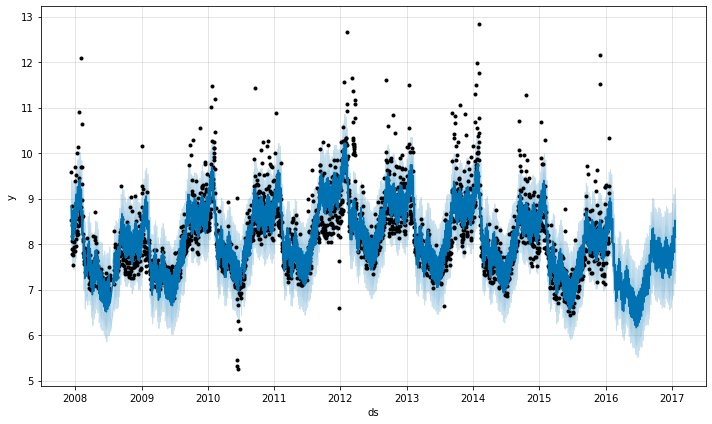

In [72]:
fig1 = m.plot(forecast)

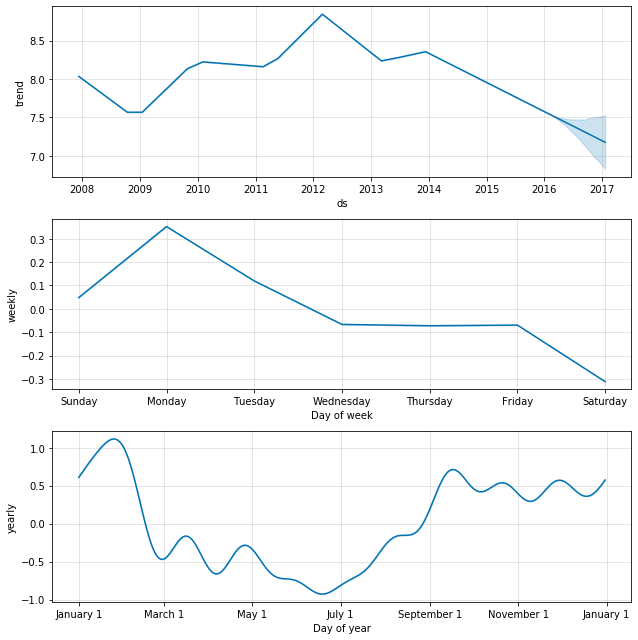

In [73]:
fig2 = m.plot_components(forecast)

# PRACTICING WITH ZILLOW

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/Zip_Zhvi_SingleFamilyResidence.csv', encoding='latin')

In [0]:
CA = df[df.State == 'CA']
LA = CA[CA.CountyName == 'Los Angeles County']
mine = LA[LA.RegionName == 90039]

In [0]:
# df = mine.copy()
# df_t = df.loc[:, '1997-01':'2018-12'].T

In [77]:
df = mine.copy()
df_t = df.loc[:, '1997-01':'2018-12'].T
df = df_t.copy()
df.reset_index(inplace=True)
# df['ds'] = df[df.columns[1]] + '-01'
df.columns = ['ds','y']
# df['ds'] = df['ds'] + '-01'
df.head()

,ds,y
0,1997-01,147935.0
1,1997-02,148799.0
2,1997-03,149280.0
3,1997-04,149552.0
4,1997-05,149320.0


In [78]:
df.tail()

,ds,y
259,2018-08,868462.0
260,2018-09,879218.0
261,2018-10,888896.0
262,2018-11,903051.0
263,2018-12,914058.0


In [79]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
624,2019-11-27
625,2019-11-28
626,2019-11-29
627,2019-11-30
628,2019-12-01


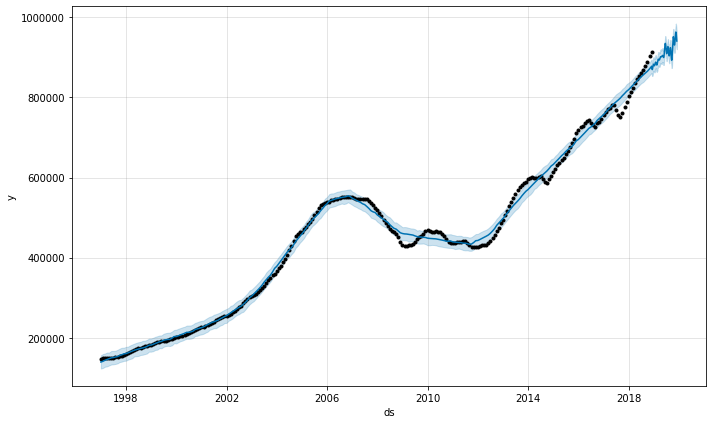

In [80]:
forecast = m.predict(future)
forecast.tail()

fig1 = m.plot(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


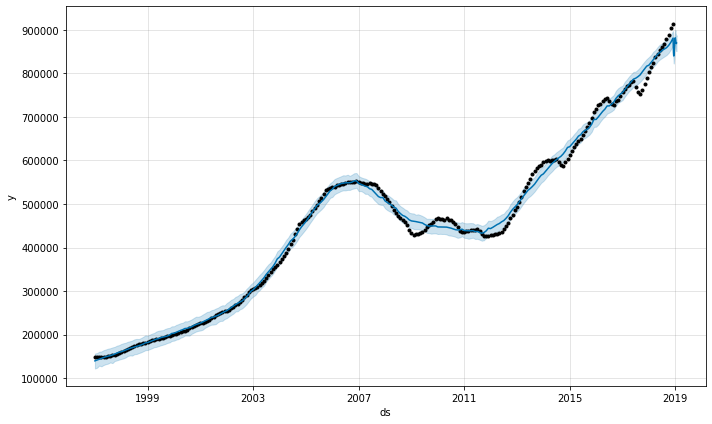

In [81]:
# df = pd.read_csv('../examples/example_retail_sales.csv')
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(periods=48)
fcst = m.predict(future)
fig = m.plot(fcst)

In [82]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1997-01-01,140047.491970,122187.251125,156589.993286,140047.491970,140047.491970,-0.001828,-0.001828,-0.001828,-0.001828,-0.001828,-0.001828,0.0,0.0,0.0,139791.432687
1,1997-02-01,141835.867074,124226.306882,157792.323187,141835.867074,141835.867074,-0.000150,-0.000150,-0.000150,-0.000150,-0.000150,-0.000150,0.0,0.0,0.0,141814.531781
2,1997-03-01,143451.173619,128994.542548,160912.284827,143451.173619,143451.173619,0.001271,0.001271,0.001271,0.001271,0.001271,0.001271,0.0,0.0,0.0,143633.507654
3,1997-04-01,145239.548723,127215.506933,161422.985381,145239.548723,145239.548723,0.002450,0.002450,0.002450,0.002450,0.002450,0.002450,0.0,0.0,0.0,145595.329110
4,1997-05-01,146970.234308,130267.104554,164323.678412,146970.234308,146970.234308,0.003117,0.003117,0.003117,0.003117,0.003117,0.003117,0.0,0.0,0.0,147428.370071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2019-01-14,884823.065837,851367.278144,884940.626978,884823.065837,884823.065837,-0.018989,-0.018989,-0.018989,-0.018989,-0.018989,-0.018989,0.0,0.0,0.0,868020.766237
308,2019-01-15,884994.214243,851579.017831,885911.379416,884994.214243,884994.214243,-0.019171,-0.019171,-0.019171,-0.019171,-0.019171,-0.019171,0.0,0.0,0.0,868027.822692
309,2019-01-16,885165.362649,851019.984804,884712.932237,885165.362649,885165.362649,-0.019036,-0.019036,-0.019036,-0.019036,-0.019036,-0.019036,0.0,0.0,0.0,868315.223924
310,2019-01-17,885336.511055,851721.103683,887087.420135,885336.511055,885336.511055,-0.018594,-0.018594,-0.018594,-0.018594,-0.018594,-0.018594,0.0,0.0,0.0,868874.659050


In [83]:
len(df)

264

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


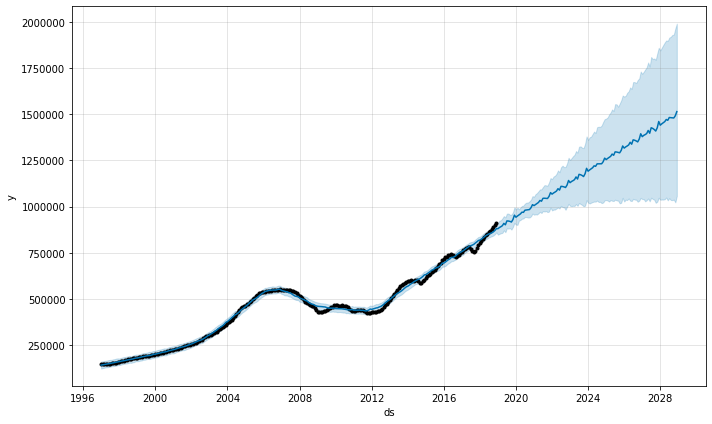

In [97]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=264).fit(df)
future = m.make_future_dataframe(periods=120, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


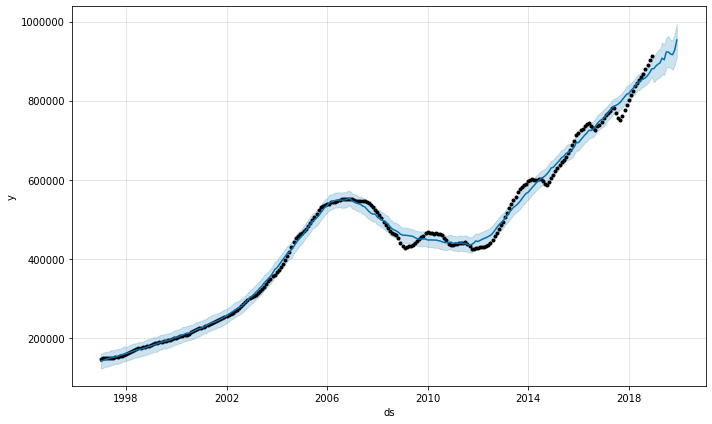

In [85]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=264).fit(df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)


In [86]:
df

,ds,y
0,1997-01,147935.0
1,1997-02,148799.0
2,1997-03,149280.0
3,1997-04,149552.0
4,1997-05,149320.0
...,...,...
259,2018-08,868462.0
260,2018-09,879218.0
261,2018-10,888896.0
262,2018-11,903051.0


In [87]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='M')
future.tail()


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
271,2019-07-31
272,2019-08-31
273,2019-09-30
274,2019-10-31
275,2019-11-30


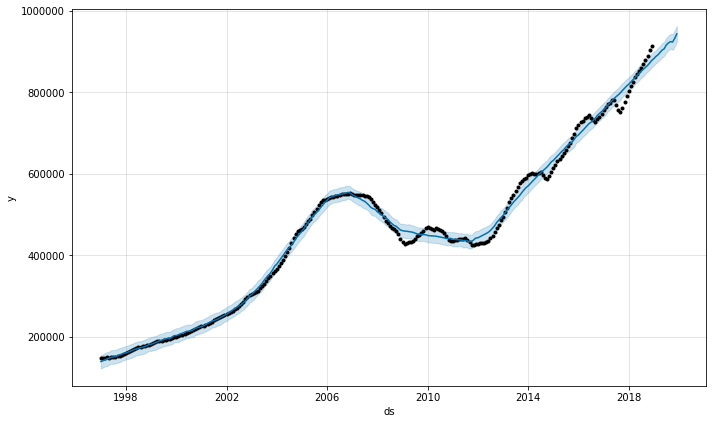

In [88]:
forecast = m.predict(future)
forecast.tail()

fig1 = m.plot(forecast)

In [89]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
271,2019-07-31,918473.369818,902613.865705,938495.782575,913448.589808,922065.797615,2323.096416,2323.096416,2323.096416,2323.096416,2323.096416,2323.096416,0.0,0.0,0.0,920796.466234
272,2019-08-31,923759.835346,906457.330437,942717.089958,917444.302157,928700.069581,316.944131,316.944131,316.944131,316.944131,316.944131,316.944131,0.0,0.0,0.0,924076.779476
273,2019-09-30,928875.769727,903878.037350,942229.923960,921240.232748,935426.789393,-5867.834013,-5867.834013,-5867.834013,-5867.834013,-5867.834013,-5867.834013,0.0,0.0,0.0,923007.935714
274,2019-10-31,934162.235255,912278.901934,950962.684107,924779.022588,942742.578093,-1841.329851,-1841.329851,-1841.329851,-1841.329851,-1841.329851,-1841.329851,0.0,0.0,0.0,932320.905404
275,2019-11-30,939278.169636,923329.638442,962380.444046,928995.886814,949423.632385,3670.706646,3670.706646,3670.706646,3670.706646,3670.706646,3670.706646,0.0,0.0,0.0,942948.876282


Text(32.375, 0.5, 'TESTING TESTING')

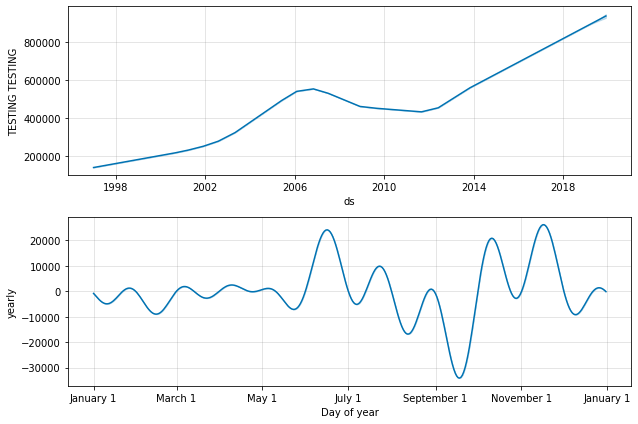

In [92]:
components_fig = m.plot_components(forecast)
axes = components_fig.get_axes()
axes[0].set_ylabel('TESTING TESTING')

In [94]:
CA

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
13,97564,94109,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,14,547676.0,547569.0,536539.0,536211.0,536288.0,544996.0,549733.0,548116.0,548056.0,556765.0,564078.0,568911.0,563733.0,567592.0,576927.0,590090.0,601843.0,607732.0,612399.0,618075.0,624078.0,619463.0,608251.0,598124.0,599915.0,605774.0,612060.0,619972.0,630063.0,639649.0,648839.0,660816.0,673743.0,...,2076723.0,2089536.0,2116069.0,2126269.0,2136544.0,2130549.0,2125238.0,2136355.0,2157234.0,2183082.0,2201513.0,2223619.0,2242654.0,2262404.0,2273661,2288114,2296814,2319273,2340441,2367999,2377043,2406408,2437497,2468207,2497009,2527010,2560823,2571444,2588508,2602537,2603723,2596306,2594652,2619794,2639943,2653455,2659471,2673801,2688969,2717489
21,96107,90250,Hawthorne,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,22,174520.0,174451.0,174208.0,174168.0,174272.0,174236.0,174011.0,173853.0,173880.0,173809.0,173430.0,172856.0,172239.0,171385.0,170904.0,171034.0,171937.0,172959.0,173708.0,174116.0,174672.0,176446.0,178775.0,180840.0,181787.0,182670.0,183373.0,183753.0,184170.0,185105.0,186263.0,187815.0,188620.0,...,542639.0,549684.0,554883.0,559601.0,565991.0,572281.0,577192.0,580694.0,585780.0,590338.0,592356.0,593805.0,595088.0,598773.0,604365,610036,616579,623096,630327,635907,639595,642727,642779,642257,642941,647773,652424,654329,654836,654122,653035,654325,656639,660217,657600,656051,656649,661550,665524,670833
39,97771,94565,Pittsburg,CA,San Francisco-Oakland-Hayward,Contra Costa County,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,519924.0,520437.0,520271.0,521608.0,526538.0,534053.0,540373.0,544590.0,546909.0,545765.0,545227.0,545969.0,550546.0,552338.0,555309,559167,570681,581688,589077,588331,588979,590588,593489,591277,592299,591549,590131,585682,587867,590192,591096,588183,586736,584946,584380,582565,581526,579674,579779,582825
43,96027,90046,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,44,158703.0,158615.0,158990.0,159599.0,160228.0,161176.0,162302.0,163102.0,163659.0,164005.0,164238.0,165215.0,167196.0,168901.0,170638.0,171418.0,173336.0,174781.0,176926.0,178643.0,180776.0,183543.0,186489.0,188650.0,190057.0,192063.0,194619.0,196076.0,197877.0,200594.0,203909.0,206660.0,208435.0,...,1125483.0,1141019.0,1150330.0,1161896.0,1179904.0,1195337.0,1208427.0,1219575.0,1236950.0,1248887.0,1259457.0,1272009.0,1291359.0,1312526.0,1335419,1356609,1380975,1408153,1434319,1452009,1454944,1455943,1460135,1471859,1488243,1508333,1526004,1537515,1545734,1549924,1550051,1554922,1566579,1580344,1588563,1599202,1619582,1643242,1655745,1668029
87,97711,94501,Alameda,CA,San Francisco-Oakland-Hayward,Alameda County,88,164594.0,164065.0,163554.0,163687.0,164207.0,164802.0,164966.0,164895.0,165257.0,166068.0,167170.0,167651.0,167925.0,168804.0,170949.0,173937.0,176381.0,178295.0,179198.0,179969.0,181228.0,183009.0,185088.0,186707.0,188432.0,189955.0,191916.0,194937.0,198030.0,201294.0,202926.0,204314.0,204491.0,...,823270.0,832964.0,845602.0,855472.0,862741.0,869135.0,880611.0,888377.0,892645.0,898715.0,900458.0,901673.0,907587.0,917554.0,931512,947430,962747,973865,980028,988153,995688,997469,1003458,1013300,1019174,1023141,1024986,1021306,1013708,1011229,1019833,1029955,1038937,1043473,1051026,1051526,105

In [95]:
LA

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
21,96107,90250,Hawthorne,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,22,174520.0,174451.0,174208.0,174168.0,174272.0,174236.0,174011.0,173853.0,173880.0,173809.0,173430.0,172856.0,172239.0,171385.0,170904.0,171034.0,171937.0,172959.0,173708.0,174116.0,174672.0,176446.0,178775.0,180840.0,181787.0,182670.0,183373.0,183753.0,184170.0,185105.0,186263.0,187815.0,188620.0,...,542639.0,549684.0,554883.0,559601.0,565991.0,572281.0,577192.0,580694.0,585780.0,590338.0,592356.0,593805.0,595088.0,598773.0,604365,610036,616579,623096,630327,635907,639595,642727,642779,642257,642941,647773,652424,654329,654836,654122,653035,654325,656639,660217,657600,656051,656649,661550,665524,670833
43,96027,90046,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,44,158703.0,158615.0,158990.0,159599.0,160228.0,161176.0,162302.0,163102.0,163659.0,164005.0,164238.0,165215.0,167196.0,168901.0,170638.0,171418.0,173336.0,174781.0,176926.0,178643.0,180776.0,183543.0,186489.0,188650.0,190057.0,192063.0,194619.0,196076.0,197877.0,200594.0,203909.0,206660.0,208435.0,...,1125483.0,1141019.0,1150330.0,1161896.0,1179904.0,1195337.0,1208427.0,1219575.0,1236950.0,1248887.0,1259457.0,1272009.0,1291359.0,1312526.0,1335419,1356609,1380975,1408153,1434319,1452009,1454944,1455943,1460135,1471859,1488243,1508333,1526004,1537515,1545734,1549924,1550051,1554922,1566579,1580344,1588563,1599202,1619582,1643242,1655745,1668029
98,96015,90034,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,99,249808.0,249482.0,250401.0,251056.0,251514.0,251397.0,250283.0,249968.0,250338.0,251984.0,252901.0,254188.0,254578.0,255822.0,256382.0,257680.0,260300.0,263348.0,266764.0,268164.0,270148.0,273509.0,278206.0,282508.0,285693.0,289000.0,292101.0,295544.0,299422.0,303572.0,307245.0,311989.0,316186.0,...,1098613.0,1116683.0,1129006.0,1141621.0,1155358.0,1168045.0,1176148.0,1183092.0,1192333.0,1199192.0,1190123.0,1184125.0,1188810.0,1214663.0,1247125,1270676,1288018,1305398,1324662,1344220,1351806,1356336,1349641,1345237,1341463,1349432,1353677,1355101,1356760,1357547,1354072,1354989,1360972,1371112,1357947,1349303,1345223,1364396,1377603,1394108
111,96239,90805,Long Beach,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,112,137817.0,137415.0,137248.0,137198.0,137274.0,137207.0,137069.0,136945.0,136878.0,136589.0,136326.0,135893.0,135554.0,134987.0,134640.0,134405.0,134764.0,135245.0,135914.0,136466.0,137104.0,138896.0,140825.0,142597.0,143056.0,143338.0,143329.0,143061.0,142901.0,143393.0,143855.0,144632.0,144637.0,...,401058.0,406339.0,409653.0,412212.0,415488.0,419026.0,421879.0,423376.0,426035.0,428631.0,430342.0,431923.0,433537.0,436756.0,442200,447966,452898,457703,462067,465877,467806,469763,470023,469687,468882,470758,472025,472819,472463,471784,470695,471657,472929,475373,474002,473754,474411,479144,483458,488025
113,96193,90650,Norwalk,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,114,147481.0,147182.0,146908.0,146755.0,146450.0,146097.0,145692.0,145414.0,145158.0,144947.0,144763.0,144611.0,144451.0,144117.0,143890.0,143867.0,144347.0,144856.0,145225.0,145311.0,145568.0,146854.0,148378.0,149777.0,150252.0,150679.0,151164.0,151188.0,151347.0,151833.0,152567.0,153598.0,154239.0,...,432422.0,436375.0,438859.0,440851.0,444237.0,447533.0,450426.0,452110.0,454994.0,457611.0,459918.0,461409.0,462772.0,464739.0

In [0]:
# for 
# m = Prophet(seasonality_mode='multiplicative', mcmc_samples=264).fit(df)
# future = m.make_future_dataframe(periods=120, freq='M')
# fcst = m.predict(future)
# fig = m.plot(fcst)


def prophet_predict_prices_for(df, location_name):
  df_t = df.loc[:, '1997-01':'2017-12'].T
  df_t['avg'] = df_t.mean(numeric_only=True, axis=1)
  df_t.reset_index(inplace=True)
  columns = ['index', 'avg']
  df = pd.DataFrame(df_t, columns = columns)
  df = df.rename(index=str, columns={"avg": "y", "index": "ds"})
  # m = Prophet()
  # m.fit(df)
  m = Prophet(seasonality_mode='multiplicative', mcmc_samples=264).fit(df)
  future = m.make_future_dataframe(periods=120, freq='M')
  # future = m.make_future_dataframe(periods=12, freq='M')
  forecast = m.predict(future)
  print("====",location_name,"====")
  forcast_fig = m.plot(forecast)
  f_axes = forcast_fig.get_axes()
  f_axes[0].set_xlabel('DATE')
  f_axes[0].set_ylabel(location_name)

In [0]:
glendale = LA[LA.City == 'Glendale']

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


==== 91201 ====


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


==== 91202 ====


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


==== 91203 ====


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


==== 91204 ====


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


==== 91205 ====


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


==== 91206 ====


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


==== 91207 ====


==== 91208 ====


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


==== 91214 ====


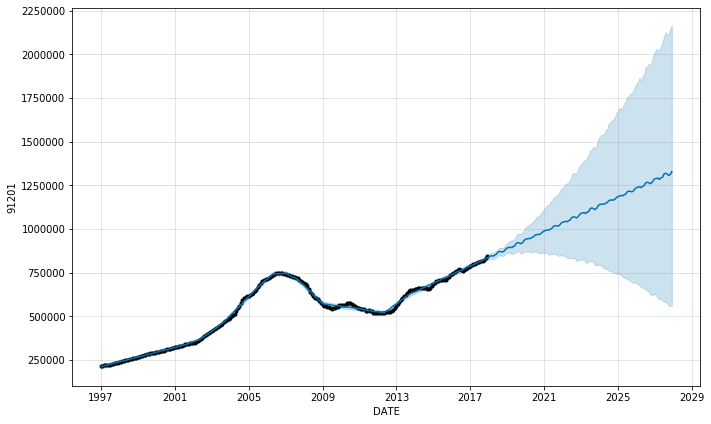

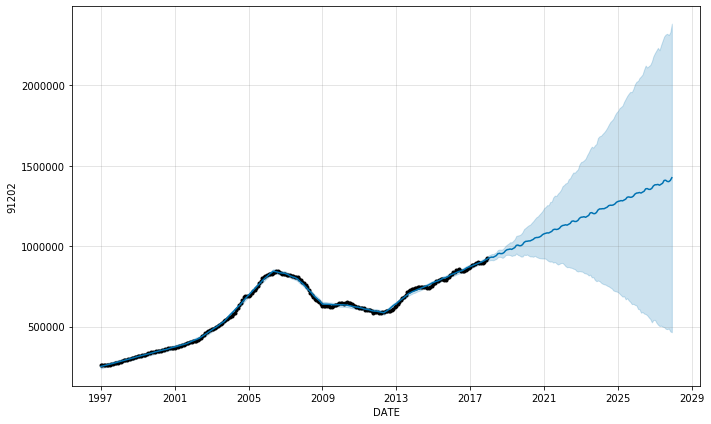

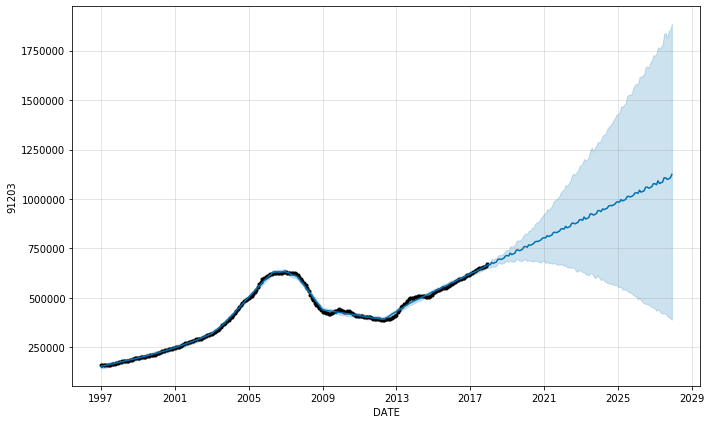

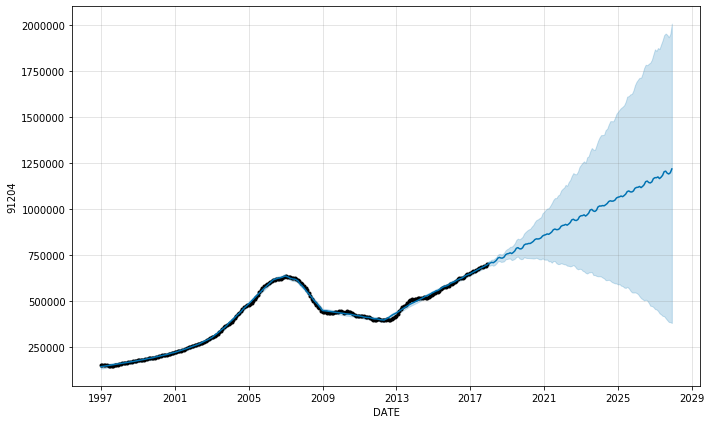

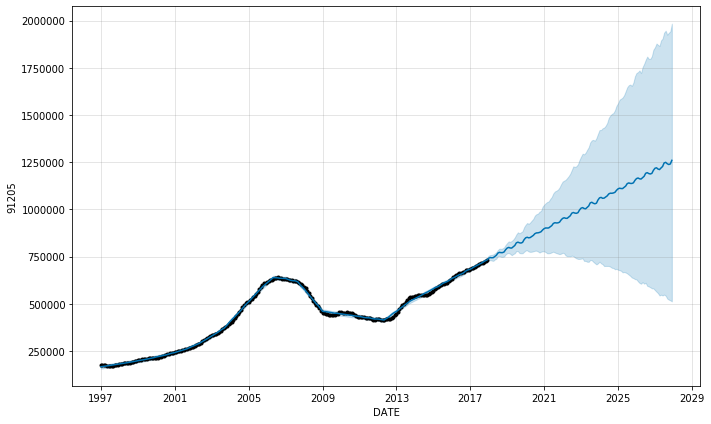

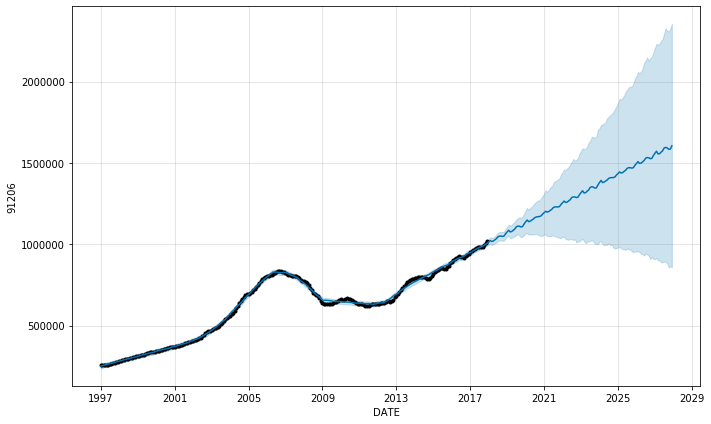

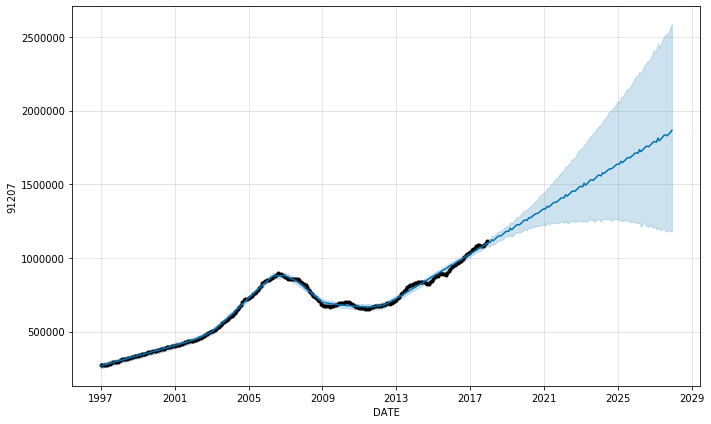

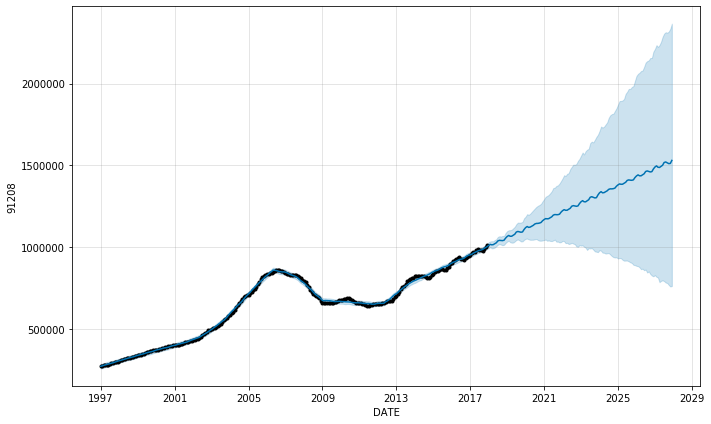

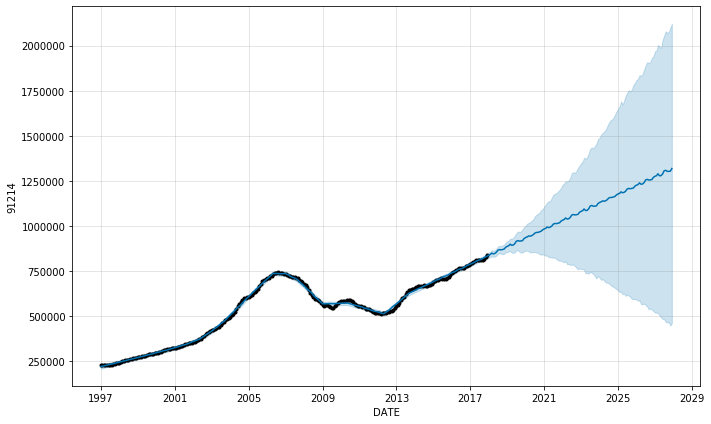

In [109]:
df = glendale.copy()
for zipcode in set(df['RegionName']):
  region_df = df[df['RegionName'] == zipcode]
  prophet_predict_prices_for(region_df, str(zipcode))

In [111]:
df = mine.copy()
df_t = df.loc[:, '1997-01':'2018-12'].T
df = df_t.copy()
df.reset_index(inplace=True)
# df['ds'] = df[df.columns[1]] + '-01'
df.columns = ['ds','y']
# df['ds'] = df['ds'] + '-01'
df.head()

,ds,y
0,1997-01,147935.0
1,1997-02,148799.0
2,1997-03,149280.0
3,1997-04,149552.0
4,1997-05,149320.0


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


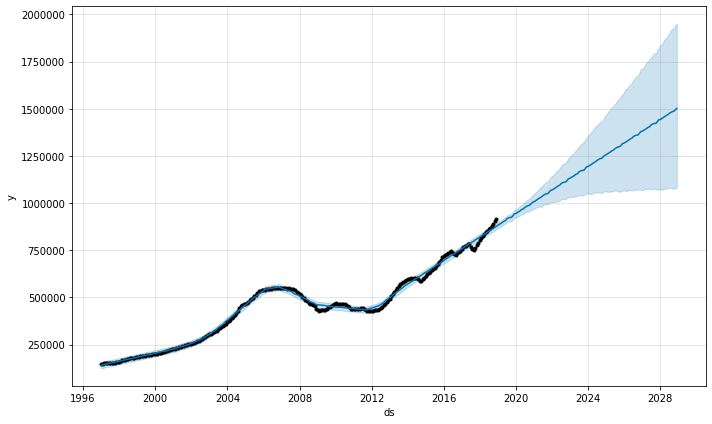

In [112]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=120, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)


In [113]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-01-01,1.403879e+05,1.224807e+05,1.550072e+05,1.403879e+05,1.403879e+05,-863.332396,-863.332396,-863.332396,-863.332396,-863.332396,-863.332396,0.0,0.0,0.0,1.395246e+05
1,1997-02-01,1.421767e+05,1.247782e+05,1.592319e+05,1.421767e+05,1.421767e+05,-719.485451,-719.485451,-719.485451,-719.485451,-719.485451,-719.485451,0.0,0.0,0.0,1.414573e+05
2,1997-03-01,1.437924e+05,1.271982e+05,1.610423e+05,1.437924e+05,1.437924e+05,66.933588,66.933588,66.933588,66.933588,66.933588,66.933588,0.0,0.0,0.0,1.438594e+05
3,1997-04-01,1.455813e+05,1.295119e+05,1.623841e+05,1.455813e+05,1.455813e+05,314.960898,314.960898,314.960898,314.960898,314.960898,314.960898,0.0,0.0,0.0,1.458962e+05
4,1997-05-01,1.473124e+05,1.322133e+05,1.647389e+05,1.473124e+05,1.473124e+05,687.660365,687.660365,687.660365,687.660365,687.660365,687.660365,0.0,0.0,0.0,1.480000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,2028-07-31,1.479180e+06,1.080462e+06,1.917491e+06,1.082229e+06,1.906088e+06,880.118140,880.118140,880.118140,880.118140,880.118140,880.118140,0.0,0.0,0.0,1.480060e+06
380,2028-08-31,1.484466e+06,1.077554e+06,1.922085e+06,1.084508e+06,1.918488e+06,-253.024316,-253.024316,-253.024316,-253.024316,-253.024316,-253.024316,0.0,0.0,0.0,1.484213e+06
381,2028-09-30,1.489582e+06,1.074314e+06,1.929589e+06,1.085996e+06,1.932973e+06,-3027.946570,-3027.946570,-3027.946570,-3027.946570,-3027.946570,-3027.946570,0.0,0.0,0.0,1.486554e+06
382,2028-10-31,1.494869e+06,1.078185e+06,1.943399e+06,1.082751e+06,1.947499e+06,-1111.523930,-1111.523930,-1111.523930,-1111.523930,-1111.523930,-1111.523930,0.0,0.0,0.0,1.493757e+06


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


274366.1740152382


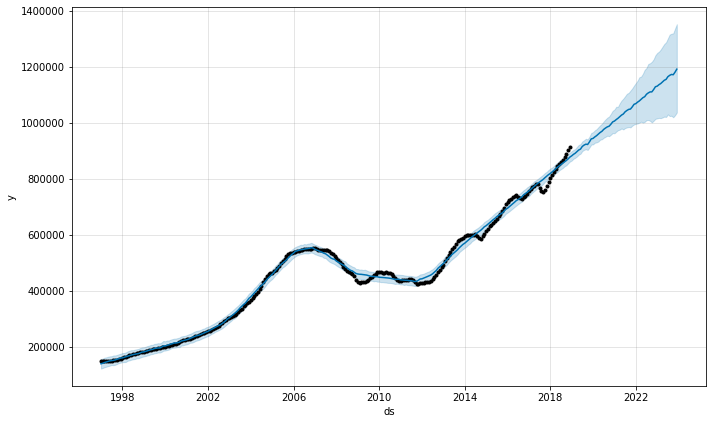

In [142]:
m = Prophet()
m.fit(df)
invest_price = df.tail(1)
future = m.make_future_dataframe(periods=60, freq='M')
fcst = m.predict(future)
sell_price = fcst.tail(1)
print(sell_price['trend'].values[0] - invest_price['y'].values[0])
fig = m.plot(fcst)


In [0]:
invest_price = df.tail(1)

In [0]:
sell_price = fcst.tail(1)

In [141]:
sell_price['trend'].values[0] - invest_price['y'].values[0]

274366.1740152382

In [138]:
type(sell_price['trend'])

pandas.core.series.Series

In [139]:
sell_price['trend'].values[0]

1188424.1740152382

In [140]:
sell_price

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
323,2023-11-30,1.188424e+06,1.041552e+06,1.332581e+06,1.039249e+06,1.325371e+06,3670.706646,3670.706646,3670.706646,3670.706646,3670.706646,3670.706646,0.0,0.0,0.0,1.192095e+06


In [0]:
def get_investment_difference(df, zip_name):
  df_t = df.loc[:, '1997-01':'2017-12'].T
  df_t['avg'] = df_t.mean(numeric_only=True, axis=1)
  df_t.reset_index(inplace=True)
  columns = ['index', 'avg']
  df = pd.DataFrame(df_t, columns = columns)
  df = df.rename(index=str, columns={"avg": "y", "index": "ds"})
  m = Prophet()
  m.fit(df)
  invest_price = df.tail(1)
  future = m.make_future_dataframe(periods=60, freq='M')
  fcst = m.predict(future)
  sell_price = fcst.tail(1)
  print('++++++++',zip_name)
  print(sell_price['trend'].values[0] - invest_price['y'].values[0])
  fig = m.plot(fcst)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


++++++++ 91201
236843.65637025773


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


++++++++ 91202
244537.5453543407


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


++++++++ 91203
218796.04965441872


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


++++++++ 91204
254380.26474907843


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


++++++++ 91205
259213.92290523078


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


++++++++ 91206
287514.6916984883


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


++++++++ 91207
359584.92270615813


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


++++++++ 91208
251286.40563258925
++++++++ 91214
245259.13723531668


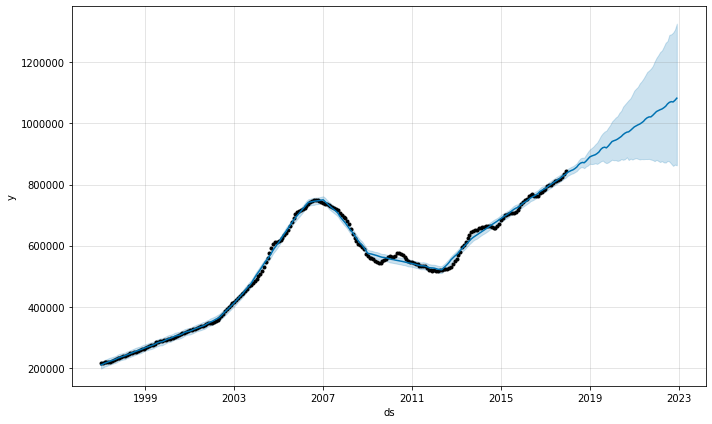

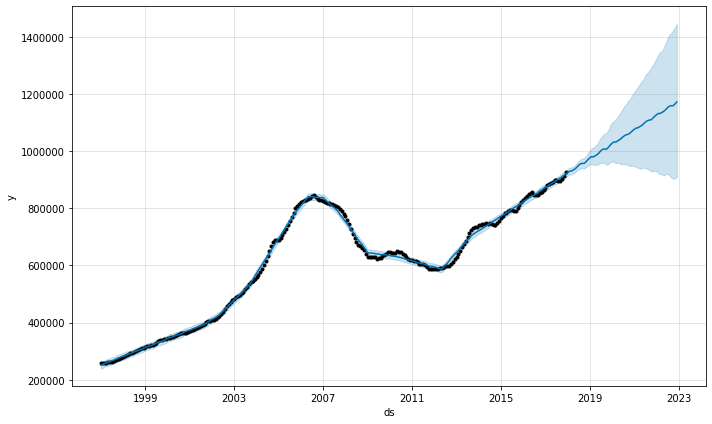

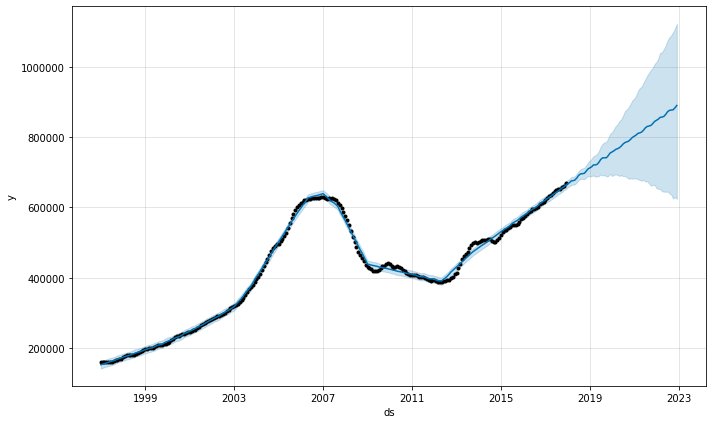

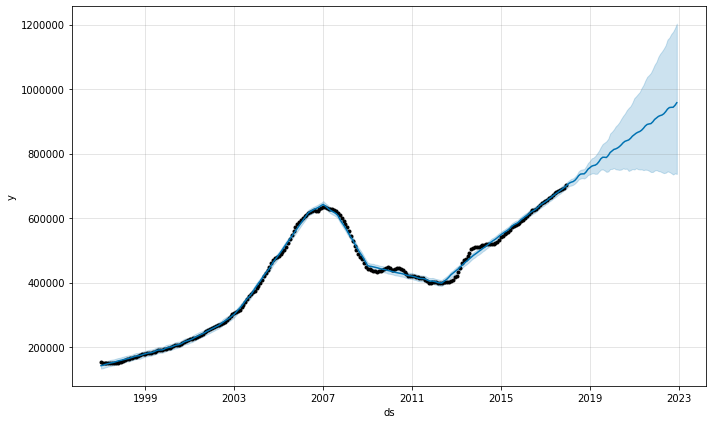

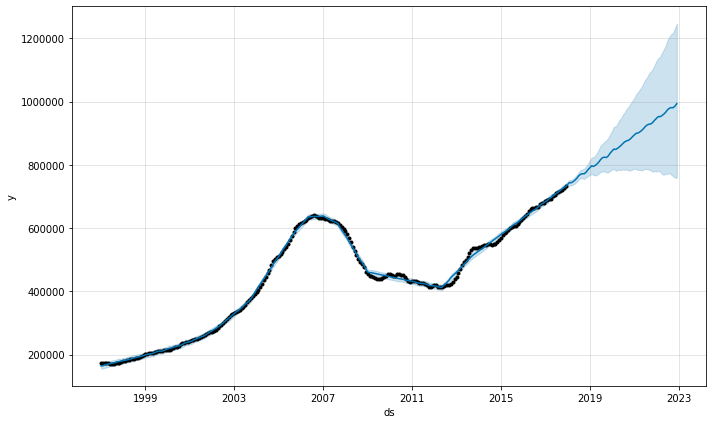

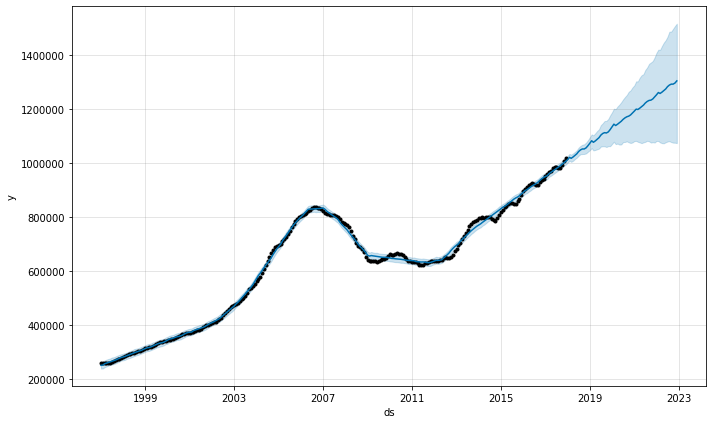

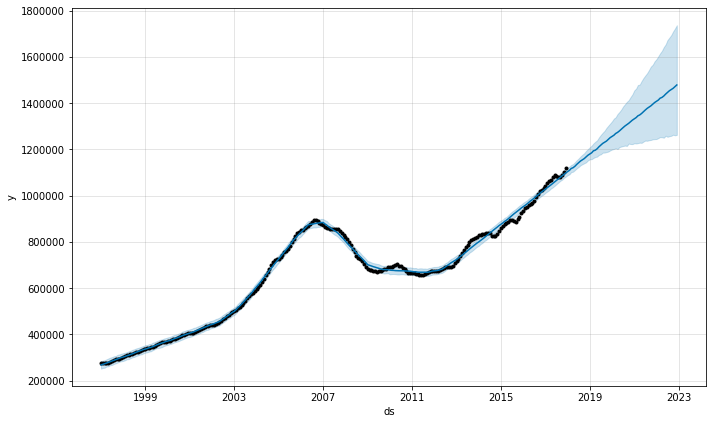

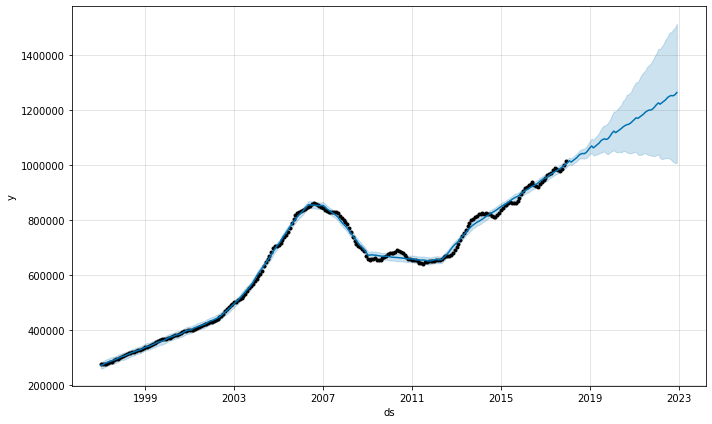

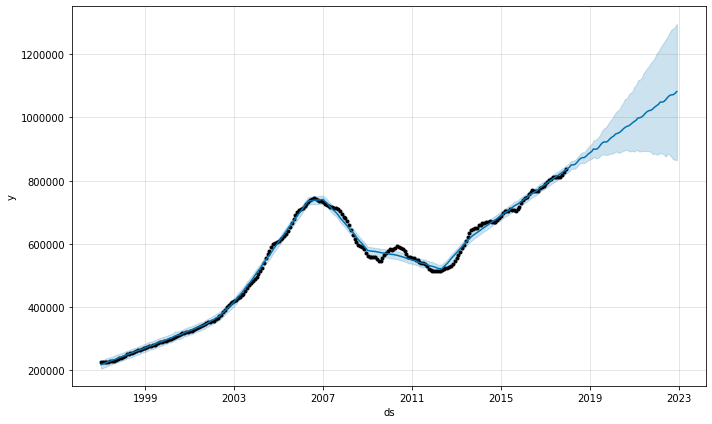

In [149]:
df = glendale.copy()
for zipcode in set(df['RegionName']):
  region_df = df[df['RegionName'] == zipcode]
  get_investment_difference(region_df, str(zipcode))